In [5]:
import io
import matplotlib.pyplot as plt
import csv
import json
import re
import pandas as pd
import seaborn as sns
import numpy as np
import math
userdatapath= '/home/titli/Documents/Springboard1/test.csv'
userdatapath1= '/home/titli/Documents/Springboard1/test1.csv'
numsamples=1000


In [6]:
df=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)
df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"['cvVMmlU1ouS3I5fhutaryQ', 'nj6UZ8tdGo8YJ9lUMT...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"['0njfJmB-7n84DlIgUByCNw', 'rFn3Xe3RqHxRSxWOU1...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [7]:
frnds= df.friends.apply(eval)
frnds.head()

0    [cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...
1    [0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...
2                                                   []
3                                                   []
4                                                   []
Name: friends, dtype: object

In [8]:
cols='average_stars 	compliment_cool 	compliment_cute 	compliment_funny 	compliment_hot 	compliment_list 	compliment_more 	compliment_note 	compliment_photos compliment_plain  compliment_writer compliment_profile review_count  fans  funny'.split()
#cols='average_stars'
X=df[cols]
X.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_writer,compliment_profile,review_count,fans,funny
0,4.67,0,0,0,0,0,0,0,0,1,0,0,8,0,0
1,3.70,0,0,0,0,0,0,0,0,0,0,0,10,0,0
2,2.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4.67,0,0,0,0,0,0,0,0,0,0,0,6,0,0
4,4.67,0,0,0,0,0,0,0,0,0,0,0,3,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd460213438>,
      dtype=object)

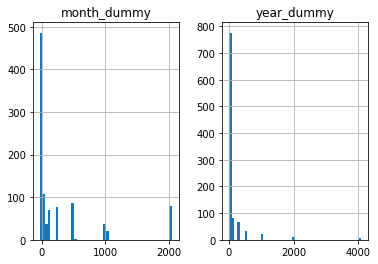

In [23]:
def getnumericyear(A):
    years= ['2004','2005','2006', '2007', '2008' ,'2009', '2010', '2011', '2012', '2013', '2014', '2015', 
        '2016', '2017', '2018']
    for i, x in enumerate(years):
        if (A in x)==True:
            return i+1
def getnumericmonth(B):
    months=['01','02', '03', '04', '05', '06', '07','08', '09', '10', '11','12']
    for i, x in enumerate(months):
        if (B in x)==True:
            return i+1
def getrange(B):
    if B <= -300: return -3
    if B <= -200 and B > -300: return -2
    if B <= -100 and B > -200: return -1
    if B <= 0 and B > -100: return 0
    if B <= 100 and B > 0: return 1
    if B <= 200 and B > 100: return 2
    if B <= 300 and B > 200: return 3
    
Xyear=df['yelping_since']   
df1 = []
for k in range(0,numsamples):
    dyear=(Xyear.iloc[k]).split("-")
    rr1= np.int_(np.concatenate([np.zeros(getnumericmonth(dyear[1])-1),[1],np.zeros(12-getnumericmonth(dyear[1]))]).tolist()) 
    month_d= (int('1'+''.join(map(str, rr1)),2))+ int(dyear[2])-4127 # subtract mode
    rr2= np.int_(np.concatenate([np.zeros(getnumericyear(dyear[0])-1),[1],np.zeros(15-getnumericyear(dyear[0]))]).tolist()) 
    year_d=(int('1'+''.join(map(str, rr2)),2))-32770
    df1.append({'year_dummy': year_d, 'month_dummy': month_d })
            
    
df_yelp=pd.DataFrame(df1)
#sns.heatmap(df_yelp, annot=True)
df_yelp.hist(bins=50)

In [17]:
df['friends'].replace(to_replace= '[]', value=np.nan, inplace=True)
df['friends'].fillna(value='00', inplace=True) 
df['friends'].head()

0    ['cvVMmlU1ouS3I5fhutaryQ', 'nj6UZ8tdGo8YJ9lUMT...
1    ['0njfJmB-7n84DlIgUByCNw', 'rFn3Xe3RqHxRSxWOU1...
2                                                   00
3                                                   00
4                                                   00
Name: friends, dtype: object

In [18]:
df2 = []
for k in range(0,numsamples):
    count=0
    Xfrnd=(df['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    if dfrnd is None:
       break
    else:
       count=len(dfrnd)
       df2.append({'friend_count': count})    
df_frnd=pd.DataFrame(df2)
df_frnd.head()

,friend_count
0,9
1,77
2,0
3,0
4,0


In [19]:
df3 = []
for k in range(0,numsamples):
    count=0
    Xelite=(df['elite'].iloc[[k]].values).tolist()
    delite = (", ".join(Xelite)).split(',')[1:-1]
    if delite is None:
       break
    else:
       count=len(delite)
       df3.append({'elite_count': count})    
df_elite=pd.DataFrame(df3)
df_elite.head()

,elite_count
0,0
1,0
2,0
3,0
4,0


In [24]:
X1 = pd.concat([X, df_yelp, df_frnd, df_elite], axis=1)
#result.to_csv(userdatapath1)
X1.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_writer,compliment_profile,review_count,fans,funny,month_dummy,year_dummy,friend_count,elite_count
0,4.67,0,0,0,0,0,0,0,0,1,0,0,8,0,0,-26,14,9,0
1,3.70,0,0,0,0,0,0,0,0,0,0,0,10,0,0,1,30,77,0
2,2.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,483,0,0,0
3,4.67,0,0,0,0,0,0,0,0,0,0,0,6,0,0,494,6,0,0
4,4.67,0,0,0,0,0,0,0,0,0,0,0,3,0,0,-15,2,0,0


# Bootstraping

In [21]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
#data1= np.array(X1.to_records().view(type=np.matrix))
data1 = X1.values
data1

array([[4.6700e+00, 0.0000e+00, 0.0000e+00, ..., 3.2784e+04, 9.0000e+00,
        0.0000e+00],
       [3.7000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2800e+04, 7.7000e+01,
        0.0000e+00],
       [2.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2770e+04, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.6500e+00, 3.0000e+00, 0.0000e+00, ..., 3.3024e+04, 1.5700e+02,
        0.0000e+00],
       [5.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2772e+04, 3.2800e+02,
        0.0000e+00],
       [4.0500e+00, 3.0000e+00, 0.0000e+00, ..., 3.2772e+04, 4.6000e+02,
        0.0000e+00]])

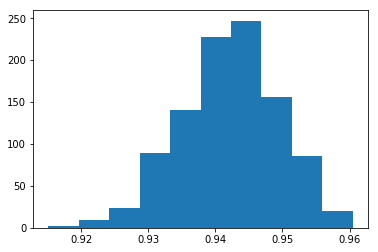

In [22]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data1) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(data1, n_samples=n_size)
    test = numpy.array([x for x in data1 if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    #print(score)
    stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))

# Semi supervised learning

In [39]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import classification_report, confusion_matrix

X=data1
y=np.ones(shape=(len(X1),))* 0 #np.nan
y[5:10]=1.0
y[10:20]=1.0
y[100:500]=1.0
y[765:834]=1.0

n_total_samples = len(y)
n_labeled_points = 200
max_iterations = 5

unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()

for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels,
                          labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print("Label Spreading model: %d labeled & %d unlabeled (%d total)"
          % (n_labeled_points, n_total_samples - n_labeled_points,
             n_total_samples))

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(
        lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([])

Automatically created module for IPython interactive environment
Iteration 0 ______________________________________________________________________
Label Spreading model: 200 labeled & 800 unlabeled (1000 total)
             precision    recall  f1-score   support

        0.0       0.57      0.65      0.61       431
        1.0       0.51      0.43      0.47       369

avg / total       0.54      0.55      0.54       800

Confusion matrix
[[279 152]
 [210 159]]


/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning


Iteration 1 ______________________________________________________________________
Label Spreading model: 200 labeled & 800 unlabeled (1000 total)
             precision    recall  f1-score   support

        0.0       0.57      0.65      0.61       431
        1.0       0.51      0.43      0.47       369

avg / total       0.54      0.55      0.54       800

Confusion matrix
[[279 152]
 [210 159]]
Iteration 2 ______________________________________________________________________
Label Spreading model: 200 labeled & 800 unlabeled (1000 total)
             precision    recall  f1-score   support

        0.0       0.57      0.65      0.61       431
        1.0       0.51      0.43      0.47       369

avg / total       0.54      0.55      0.54       800

Confusion matrix
[[279 152]
 [210 159]]


/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning


Iteration 3 ______________________________________________________________________
Label Spreading model: 200 labeled & 800 unlabeled (1000 total)
             precision    recall  f1-score   support

        0.0       0.57      0.65      0.61       431
        1.0       0.51      0.43      0.47       369

avg / total       0.54      0.55      0.54       800

Confusion matrix
[[279 152]
 [210 159]]
Iteration 4 ______________________________________________________________________
Label Spreading model: 200 labeled & 800 unlabeled (1000 total)
             precision    recall  f1-score   support

        0.0       0.57      0.65      0.61       431
        1.0       0.51      0.43      0.47       369

avg / total       0.54      0.55      0.54       800

Confusion matrix
[[279 152]
 [210 159]]


/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning


<Figure size 432x288 with 0 Axes>